# ML2 Project using Images Dataset

**Brief Description of data & objectives:**

* Main objective of neural network project is to analyze and identify behavior of machine learning techniques on weather data set.

* Given current changes in climate and spontaneous change in weather conditions, an attempt is being made to see if machine learning can identify any changes such as sudden rains or fog approaching to make better decisions.

**Data source:**

*  https://www.kaggle.com/vijaygiitk/multiclass-weather-dataset/discussion/127597


### **Importing Libraries**

In [ ]:
#Load all necessary libraries
import numpy as np
import pandas as pd
import sklearn as sk
from skimage import io, transform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time
import keras as ks
print('keras: %s' % ks.__version__)
from keras import backend as K
from keras import optimizers
from keras import regularizers
from keras import initializers
from keras import layers
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import tensorflow as tf
print('tf: %s' % tf.__version__)
import os
import zipfile
import cv2

keras: 2.9.0
tf: 2.9.2


### **Importing Dataset**

**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Folder from Google Drive**

In [ ]:
#The image files are under subdirectories named 1,2,3 etc (images of 1s are under a subdirectory called 1 etc)
#So, get a list of subdirectory names which we can use to loop through

import os
data_dir = '/content/drive/MyDrive/ML2 Final Data/multiclass weather/train'
dir_list = os.listdir(data_dir)

**Checking contents of the folder**

In [ ]:
dir_list

['cloudy', 'rainy', 'sunrise', 'foggy', 'shine']

**Exploratory Data Analysis (EDA), Cleaning & Preparing Dataset**

* Images were imported with label data and converted into an array using numpy library and labels were assigned to each image using sklearn library

* Dataset has 5 classes – cloudy, foggy, shiny, rainy & sunrise

* Images have various sizes and shapes

* Dataset has 1,528 color images and have varied topostrophy

### **Check for bad image files to exclude**

In [ ]:
import os
from os import listdir
from PIL import Image
count=0
for img in os.listdir('/content/drive/MyDrive/ML2 Final Data/multiclass weather/train'):
    if img.endswith('.png'):
     try:
      img=Image.open('/content/drive/MyDrive/ML2 Final Data/multiclass weather/train'+dir+'/'+img)
      img.verify()
     except(IOError,SyntaxError)as e:
         print('Bad file  :  '+img)
         count=count+1
         print(count)

In [ ]:
import os
from os import listdir
from PIL import Image
count=0
for img in os.listdir('/content/drive/MyDrive/ML2 Final Data/multiclass weather/train'):
    if img.endswith('.gif'):
     try:
      img=Image.open('/content/drive/MyDrive/ML2 Final Data/multiclass weather/train'+dir+'/'+img)
      img.verify()
     except(IOError,SyntaxError)as e:
         print('Bad file  :  '+img)
         count=count+1
         print(count)

In [ ]:
import os
from os import listdir
from PIL import Image
count=0
for img in os.listdir('/content/drive/MyDrive/ML2 Final Data/multiclass weather/train'):
    if img.endswith('.jpg'):
     try:
      img=Image.open('/content/drive/MyDrive/ML2 Final Data/multiclass weather/train'+dir+'/'+img)
      img.verify()
     except(IOError,SyntaxError)as e:
         print('Bad file  :  '+img)
         count=count+1
         print(count)

In [ ]:
import os
from os import listdir
from PIL import Image
count=0
for img in os.listdir('/content/drive/MyDrive/ML2 Final Data/multiclass weather/train'):
    if img.endswith('.jpeg'):
     try:
      img=Image.open('/content/drive/MyDrive/ML2 Final Data/multiclass weather/train'/+dir+'/'+img)
      img.verify()
     except(IOError,SyntaxError)as e:
         print('Bad file  :  '+img)
         count=count+1
         print(count)

###**Data Processing**

In [ ]:
#initializing Image Processing
from configparser import Interpolation
from skimage import io, transform
from PIL import Image
import cv2

#Declare and intialize img and lable arrays
img_data = []
label_data = []

#Loop through directories to load arrays
for dir in dir_list:
  img_list = os.listdir(data_dir+'/'+dir)

  for img in img_list:
    img_read = cv2.imread(data_dir+'/'+dir+'/'+img)

    try:
     img_read = cv2.resize(img_read, (300, 300))
     img_data.append(img_read)
     (b, g, r)=cv2.split(img_read)
     img_read=cv2.merge([r,g,b])
     label_data.append(dir)

    except cv2.error as e:
      print('Invalid frame!')

Invalid frame!
Invalid frame!


**Conclusion**

* This method of try & except utilizes robust mechanism to exclude imaged that would not be agle to fit in specified array.

* (b,g,r) to (r,g,b) splits image layers into Red Blue and Green slates which helps in machine learning accuracy by creating reverse tuple of images

### **Checking to ensure all image shapes are in line**

In [ ]:
for img in img_data:
  print(img.shape)

(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 

## **Pre-processing data for model**

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Convert to numpy arrays
img_data, label_data = np.array(img_data), np.array(label_data)


# integer encode label data (convert text labels to numbers) for use in keras/tensorflow
label_encoder = LabelEncoder()
label_data = label_encoder.fit_transform(label_data)

print(label_data.shape)
print(img_data.shape)

(1460,)
(1460, 300, 300, 3)


## **Preparing data for Machine Learning Model**

**Split data into train & test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(img_data, label_data, test_size=0.20, shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 300, 300, 3)
(292, 300, 300, 3)
(1168,)
(292,)


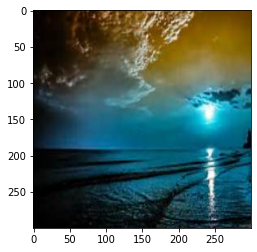

In [ ]:
# plot code
plt.imshow(x_train[24])

**Sample Image**

* We set the channel to 3 and image sizes were kept 300,300 since they are of various sizes and color hue / saturation

**Pre-processing Images in Train and Test Set**

In [ ]:
# input image dimensions
img_rows, img_cols = 300, 300

In [ ]:
# number of classes
num_classes = 5
no_channels = 3

In [ ]:
#Check backend to see if it is channel first or last
#Here number of channels is set as 3 because these are colored images
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (no_channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, no_channels)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

**Hot Encoding**

Used the hotcoding to create numeric labels and conducted normalization

In [ ]:
# Convert class vectors to binary class matrices using one hot encoding
y_train = ks.utils.to_categorical(y_train, num_classes)
y_test = ks.utils.to_categorical(y_test, num_classes)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 300, 300, 3)
(292, 300, 300, 3)
(1168, 5)
(292, 5)


**Normalization**

In [ ]:
#For a grayscale images, the pixel value is a single number that represents the brightness of the pixel.
#The most common pixel format is the byte image, where this number is stored as an 8-bit integer giving
#a range of possible values from 0 to 255. Typically zero is taken to be black, and 255 is taken to be white.
#So, to normalize the values to be between 0 and 1 divide by 255
#This is optional, normalization is not mandated
x_train /= 255
x_test /= 255

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (1168, 300, 300, 3)
x_test shape: (292, 300, 300, 3)
y_train shape: (1168, 5)
y_test shape: (292, 5)
1168 train samples
292 test samples


**Specifing initial parameters**

Dividing the data set into batches

In [ ]:
# Define batch size and epochs
bs = 10
ep = 25
sqrt = 1/(5**0.5)
print(sqrt)

0.4472135954999579


## **Model 1: Base Model**

**Building Regular multilayer fully connected (dense) networks**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (1168, 300, 300, 3)
x_test shape: (292, 300, 300, 3)
y_train shape: (1168, 5)
y_test shape: (292, 5)
1168 train samples
292 test samples


In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# define model
model=Sequential()
model.add(Flatten(input_shape=(300,300,3)))  # changed to flatten
model.add(Dense(24, activation='relu'))
model.add(Dense(16, activation='softmax'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 270000)            0         
                                                                 
 dense_5 (Dense)             (None, 24)                6480024   
                                                                 
 dense_6 (Dense)             (None, 16)                400       
                                                                 
 dense_7 (Dense)             (None, 12)                204       
                                                                 
 dense_8 (Dense)             (None, 8)                 104       
                                                                 
 dense_9 (Dense)             (None, 5)                 45        
                                                                 
Total params: 6,480,777
Trainable params: 6,480,777
No

In [ ]:
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=ep, batch_size=bs, verbose = 'auto')

Epoch 1/25
117/117 [==============================] - 4s 8ms/step - loss: 1.6515 - accuracy: 0.2021
Epoch 2/25
117/117 [==============================] - 1s 8ms/step - loss: 1.5759 - accuracy: 0.2885
Epoch 3/25
117/117 [==============================] - 1s 8ms/step - loss: 1.5361 - accuracy: 0.2748
Epoch 4/25
117/117 [==============================] - 1s 8ms/step - loss: 1.4768 - accuracy: 0.3682
Epoch 5/25
117/117 [==============================] - 1s 8ms/step - loss: 1.3924 - accuracy: 0.4075
Epoch 6/25
117/117 [==============================] - 1s 8ms/step - loss: 1.3141 - accuracy: 0.4940
Epoch 7/25
117/117 [==============================] - 1s 8ms/step - loss: 1.2521 - accuracy: 0.4949
Epoch 8/25
117/117 [==============================] - 1s 8ms/step - loss: 1.2035 - accuracy: 0.5086
Epoch 9/25
117/117 [==============================] - 1s 8ms/step - loss: 1.1765 - accuracy: 0.5163
Epoch 10/25
117/117 [==============================] - 1s 8ms/step - loss: 1.1404 - accuracy: 0.5291

In [ ]:
# evaluate the keras model
_,accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

10/10 [==============================] - 0s 16ms/step - loss: 0.8933 - accuracy: 0.6781
Accuracy: 67.81


In [ ]:
start_time = time.time()
history = model.fit(x_train, y_train, batch_size=bs, epochs=ep, verbose=1,)
print('Training duration : ', time.time() - start_time)

score = model.evaluate(x_test, y_test, batch_size=bs)
print('Network test score [loss, accuracy]:', score)

Epoch 1/25
117/117 [==============================] - 1s 8ms/step - loss: 0.7094 - accuracy: 0.7397
Epoch 2/25
117/117 [==============================] - 1s 8ms/step - loss: 0.7012 - accuracy: 0.7320
Epoch 3/25
117/117 [==============================] - 1s 8ms/step - loss: 0.6641 - accuracy: 0.7568
Epoch 4/25
117/117 [==============================] - 1s 9ms/step - loss: 0.6577 - accuracy: 0.7568
Epoch 5/25
117/117 [==============================] - 1s 8ms/step - loss: 0.6225 - accuracy: 0.7723
Epoch 6/25
117/117 [==============================] - 1s 8ms/step - loss: 0.6187 - accuracy: 0.7791
Epoch 7/25
117/117 [==============================] - 1s 8ms/step - loss: 0.6004 - accuracy: 0.7825
Epoch 8/25
117/117 [==============================] - 1s 8ms/step - loss: 0.5737 - accuracy: 0.7911
Epoch 9/25
117/117 [==============================] - 1s 8ms/step - loss: 0.5787 - accuracy: 0.7894
Epoch 10/25
117/117 [==============================] - 1s 8ms/step - loss: 0.5702 - accuracy: 0.7928

**Plotting results for visual analysis**

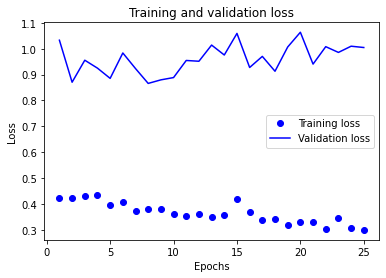

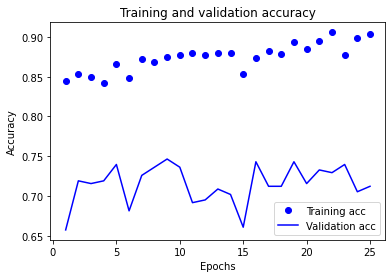

In [ ]:
history = model.fit(x_train, y_train, epochs=ep, batch_size=bs, validation_data=(x_test,y_test),verbose=0)
history_dict = history.history

#Plot training vs validation loss
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot training vs validation accuracy
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Summary Base Model**

* Images need to be flattened before dense layer to ensure correct shape

* Multiple dense layers of relu, sigmoid and softmax used to compile model after changing hierarchy, dense layers and activation types for improved accuracy

* Using above model, accuracy of 67.81% is achieved for train dataset

* When applied to test dataset, accuracy was 72.95%

* From above graphs, it is seen that training loss decreases as number of epochs increase but accuracy is flattened after 15 epochs



## **Model 2: CNN Model**

**Step 1: Weight Initialization:**
`
* When we create our neural network,we have to make choice for the initial  weights and biases.


* Idea here is that choosing weight from Gaussian distribution normalised to have mean = 0 and SD = 1/(n)^1/2, where n = number of rows gives better accuracy than choosing weights from mean = 0 and sd = 1 or sd = root over n.
* As greater the SD, flat is the curve and more is the chance of gradient getting saturated.

**Process:**
1. We will make 2 models with same architecture and functions, but with 2 different weights as 0.44 and other square root of n, which is number of rows(ie 0.01)
and compare the result.


In [ ]:
#Create the model architecture
import keras
from keras import regularizers, optimizers
from tensorflow.keras import layers, initializers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

####**Model2(a)** :
a: Weight choosen
   * distribution with SD =  0.44

####**Model2(b**) :  
b: Weight choosen
   * distribution with SD = 0.01

####**Model2(C**) :  
b: Weight choosen
   * distribution with SD(inverse of square root of n) = 0.02

#### **Model2(a) : SD = 0.44**

In [ ]:
# define convolutional model
# SD = 0.44

model = Sequential()

#Kernel size is the size of the local receptive field.  Strides is how much you slide the receptive field
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(300,300,3),
                 kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.RandomNormal(stddev=0.44)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

#Flatten before passing to dense layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
#model.add(Dense(100, activation='softmax'))
#model.add(Dropout(0.25))
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.20))

#Last layer must have neurons equal to the number of classes
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 296, 16)      4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 148, 16)      0         
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 128)               44859520  
                                                      

In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#Run the model fit
start_time = time.time()
conv_train = model.fit(x_train, y_train, batch_size=bs, epochs=ep,validation_data =(x_test,y_test), verbose=1)
print('Training duration CNN: ', time.time() - start_time)

Epoch 1/25
117/117 [==============================] - 6s 49ms/step - loss: 1.9385 - accuracy: 0.9709 - val_loss: 5.0305 - val_accuracy: 0.6575
Epoch 2/25
117/117 [==============================] - 6s 50ms/step - loss: 1.8793 - accuracy: 0.9700 - val_loss: 4.7557 - val_accuracy: 0.5822
Epoch 3/25
117/117 [==============================] - 5s 45ms/step - loss: 1.8646 - accuracy: 0.9623 - val_loss: 4.6299 - val_accuracy: 0.6849
Epoch 4/25
117/117 [==============================] - 5s 46ms/step - loss: 1.7646 - accuracy: 0.9700 - val_loss: 4.4968 - val_accuracy: 0.6473
Epoch 5/25
117/117 [==============================] - 5s 46ms/step - loss: 1.7450 - accuracy: 0.9666 - val_loss: 4.5679 - val_accuracy: 0.6438
Epoch 6/25
117/117 [==============================] - 5s 46ms/step - loss: 1.6654 - accuracy: 0.9795 - val_loss: 4.3770 - val_accuracy: 0.6301
Epoch 7/25
117/117 [==============================] - 5s 46ms/step - loss: 1.5336 - accuracy: 0.9897 - val_loss: 4.4328 - val_accuracy: 0.6438

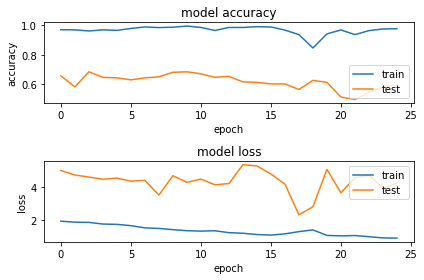

In [ ]:
# plotting the metrics
plt.subplot(2,1,1)
plt.plot(conv_train.history['accuracy'])
plt.plot(conv_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(conv_train.history['loss'])
plt.plot(conv_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
#Evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=bs)
score_train = model.evaluate(x_train, y_train, batch_size=bs)
print('Network test score [loss, accuracy]:', score)
print('Network test score_train [loss, accuracy]:', score_train)

117/117 [==============================] - 2s 15ms/step - loss: 0.7935 - accuracy: 0.9966
Network test score [loss, accuracy]: [4.255582809448242, 0.5958904027938843]
Network test score_train [loss, accuracy]: [0.7935479283332825, 0.9965753555297852]


#### **Model2(b)**
  * Changing weight initialization distribution with SD = .01 AND Mean = 0

In [ ]:
# define convolutional model

model = Sequential()

#Kernel size is the size of the local receptive field.  Strides is how much you slide the receptive field
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(300,300,3),
                 kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

#Flatten before passing to dense layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
#model.add(Dense(100, activation='softmax'))
#model.add(Dropout(0.25))
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.20))

#Last layer must have neurons equal to the number of classes
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 296, 296, 32)      2432      
                                                                 
 conv2d_3 (Conv2D)           (None, 296, 296, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 148, 148, 16)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 148, 148, 16)      0         
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               44859520  
                                                      

In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Run the model fit
start_time = time.time()
conv_train = model.fit(x_train, y_train, batch_size=bs, epochs=ep,validation_data =(x_test,y_test), verbose=1)
print('Training duration CNN: ', time.time() - start_time)

#Evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=bs)
score_train = model.evaluate(x_train, y_train, batch_size=bs)
print('Network test score [loss, accuracy]:', score)
print('Network test score_train [loss, accuracy]:', score_train)

Epoch 1/25
117/117 [==============================] - 6s 48ms/step - loss: 1.6662 - accuracy: 0.3057 - val_loss: 1.4179 - val_accuracy: 0.4110
Epoch 2/25
117/117 [==============================] - 5s 45ms/step - loss: 1.4110 - accuracy: 0.4375 - val_loss: 1.1716 - val_accuracy: 0.5582
Epoch 3/25
117/117 [==============================] - 5s 45ms/step - loss: 1.2721 - accuracy: 0.4906 - val_loss: 1.1536 - val_accuracy: 0.5308
Epoch 4/25
117/117 [==============================] - 5s 45ms/step - loss: 1.1491 - accuracy: 0.5274 - val_loss: 1.0096 - val_accuracy: 0.6301
Epoch 5/25
117/117 [==============================] - 5s 45ms/step - loss: 1.1036 - accuracy: 0.5796 - val_loss: 1.1244 - val_accuracy: 0.5205
Epoch 6/25
117/117 [==============================] - 5s 46ms/step - loss: 1.0230 - accuracy: 0.6019 - val_loss: 0.9313 - val_accuracy: 0.6610
Epoch 7/25
117/117 [==============================] - 5s 45ms/step - loss: 0.9757 - accuracy: 0.6361 - val_loss: 1.1220 - val_accuracy: 0.5137

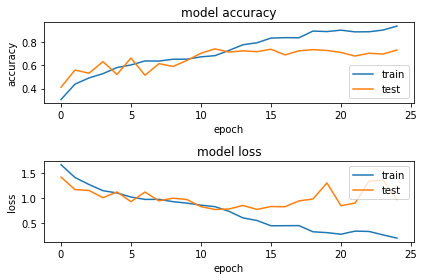

In [ ]:
# plotting the metrics
plt.subplot(2,1,1)
plt.plot(conv_train.history['accuracy'])
plt.plot(conv_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(conv_train.history['loss'])
plt.plot(conv_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
# saving the model
save_dir = "./drive/My Drive/ML2 Final Project/"
model_name = 'keras_weather_Conv.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./drive/My Drive/ML2 Final Project/keras_weather_Conv.h5 


#### **Model2(c)**  

    * Using SD = 0.02

In [ ]:
# define convolutional model

model = Sequential()

#Kernel size is the size of the local receptive field.  Strides is how much you slide the receptive field
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(300,300,3),
                 kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.RandomNormal(stddev=0.02)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

#Flatten before passing to dense layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
#model.add(Dense(100, activation='softmax'))
#model.add(Dropout(0.25))
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.20))

#Last layer must have neurons equal to the number of classes
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 296, 296, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 296, 296, 16)      4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 148, 148, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 148, 148, 16)      0         
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               44859520  
                                                      

In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Run the model fit
start_time = time.time()
conv_train = model.fit(x_train, y_train, batch_size=bs, epochs=ep,validation_data =(x_test,y_test), verbose=1)
print('Training duration CNN: ', time.time() - start_time)

#Evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=bs)
score_train = model.evaluate(x_train, y_train, batch_size=bs)
print('Network test score [loss, accuracy]:', score)
print('Network test score_train [loss, accuracy]:', score_train)

Epoch 1/25
117/117 [==============================] - 6s 49ms/step - loss: 1.7082 - accuracy: 0.4486 - val_loss: 1.3327 - val_accuracy: 0.4795
Epoch 2/25
117/117 [==============================] - 5s 45ms/step - loss: 1.1580 - accuracy: 0.5736 - val_loss: 1.0039 - val_accuracy: 0.6712
Epoch 3/25
117/117 [==============================] - 6s 49ms/step - loss: 1.0016 - accuracy: 0.6455 - val_loss: 0.7159 - val_accuracy: 0.7295
Epoch 4/25
117/117 [==============================] - 5s 45ms/step - loss: 0.8051 - accuracy: 0.7038 - val_loss: 0.8669 - val_accuracy: 0.6370
Epoch 5/25
117/117 [==============================] - 5s 46ms/step - loss: 0.7202 - accuracy: 0.7500 - val_loss: 0.7445 - val_accuracy: 0.7466
Epoch 6/25
117/117 [==============================] - 5s 46ms/step - loss: 0.6821 - accuracy: 0.7577 - val_loss: 0.7712 - val_accuracy: 0.7089
Epoch 7/25
117/117 [==============================] - 5s 45ms/step - loss: 0.6437 - accuracy: 0.7842 - val_loss: 0.7564 - val_accuracy: 0.7295

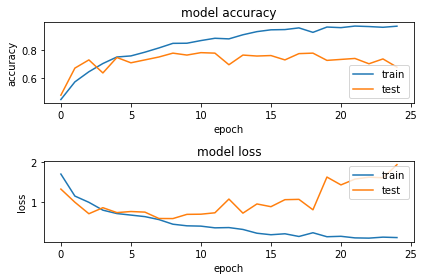

In [ ]:
# plotting the metrics
plt.subplot(2,1,1)
plt.plot(conv_train.history['accuracy'])
plt.plot(conv_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(conv_train.history['loss'])
plt.plot(conv_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## **Conclusion:**
1. Result of accuracy changed with the choice of weight choosen from  3 different distribution with different SD.
2. Greater the SD, accuracy gets decreased as curve gets flat and so gradient getting saturated probability increases and learning gets slower and stagnant.
3. Our model2(b) with sd = 0.1 is better to use than compare to model2(b) with sd = .02 and .044.


#### **Model2(b) with different Cost Function**
**Idea:**

    1. Our neuron learns by changing weight and bias at a rate determined bt partial derivative of cost function with respect to weight.
    2. Using cross entropy helps in preventing learning slow down.
    3. Here model2(b) is used with change in its cost funstion or loss function and both model accuracy is then compared.

**Using MSE as a cost function**

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import keras
from keras import regularizers, optimizers
from tensorflow.keras import layers, initializers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

#Kernel size is the size of the local receptive field.  Strides is how much you slide the receptive field
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(300,300,3),
                 kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

#Flatten before passing to dense layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
#model.add(Dense(100, activation='softmax'))
#model.add(Dropout(0.25))
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.20))

#Last layer must have neurons equal to the number of classes
model.add(Dense(5, activation='softmax'))

model.summary()

#Compile the model
model.compile(loss= "mean_squared_error",
              optimizer='adam',
              metrics=['accuracy'])


#Run the model fit
start_time = time.time()
conv_train = model.fit(x_train, y_train, batch_size=bs, epochs=ep,validation_data =(x_test,y_test), verbose=1)
print('Training duration CNN: ', time.time() - start_time)

#Evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=bs)
score_train = model.evaluate(x_train, y_train, batch_size=bs)
print('Network test score [loss, accuracy]:', score)
print('Network test score_train [loss, accuracy]:', score_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 296, 16)      4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 148, 16)      0         
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 128)               44859520  
                                                        

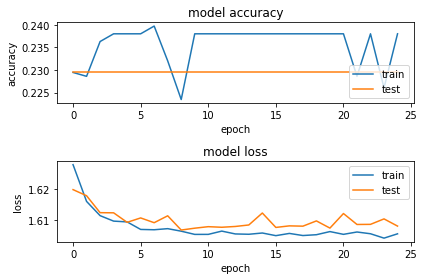

In [ ]:
# plotting the metrics
plt.subplot(2,1,1)
plt.plot(conv_train.history['accuracy'])
plt.plot(conv_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(conv_train.history['loss'])
plt.plot(conv_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

**Conclusion**:
    1. MSE as loss function in base CNN model with SD = .01 provided with better accuracy on  than using cost function as  Cataegorical_cross.
    2. Accuracy for MSE: 78%
    3. Accuracy for categorical crossentropy: 67%

**Model2(b) with Different Optimiser:**
   1. Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses.
   2. While training deep learning model,we need to specify each epoch weight and minimize the loss
   3. An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.
   4. It is used to minimize loss.
   5. Different optimizers to make changes in your weights and learning rate.
   6. Some optimisers used are: Gradient Descent(derivative of cost function), SGD, SGD with momentum, Nestrov.
   7. Reguliser used as l2


**Process:**
   * Repalcing Optimiser "Adam" used in Model2(b) with SGD with momentum and Nestrov.

In [ ]:
# model with optimiser changed to only sgd aand repacing adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import keras
from keras import regularizers, optimizers
from tensorflow.keras import layers, initializers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

#Kernel size is the size of the local receptive field.  Strides is how much you slide the receptive field
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(300,300,3),
                 kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

#Flatten before passing to dense layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
#model.add(Dense(100, activation='softmax'))
#model.add(Dropout(0.25))
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.20))

#Last layer must have neurons equal to the number of classes
model.add(Dense(5, activation='softmax'))

model.summary()



#Compile the model
optimizer_sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss= "categorical_crossentropy",
              optimizer= optimizer_sgd,
              metrics=['accuracy'])


#Run the model fit
start_time = time.time()
conv_train = model.fit(x_train, y_train, batch_size=bs, epochs=ep,validation_data =(x_test,y_test), verbose=1)
print('Training duration CNN: ', time.time() - start_time)


#Evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=bs)
score_train = model.evaluate(x_train, y_train, batch_size=bs)
print('Network test score [loss, accuracy]:', score)
print('Network test score_train [loss, accuracy]:', score_train)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 296, 296, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 296, 296, 16)      4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 148, 148, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 148, 148, 16)      0         
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               44859520  
                                                      

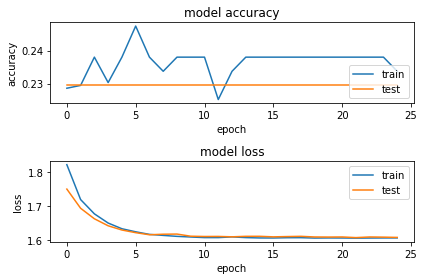

In [ ]:
# plotting the metrics
plt.subplot(2,1,1)
plt.plot(conv_train.history['accuracy'])
plt.plot(conv_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(conv_train.history['loss'])
plt.plot(conv_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

**Summary CNN Model**

* Images need to be flattened before dense layer to ensure correct shape

* Multiple dense layers of relu, sigmoid and softmax used to compile model after changing hierarchy, dense layers and activation types for improved accuracy

* Kernel size of 5 is used in activation layer and 3 in the corresponding layer

* RandomNormal initializerwas used for this CNN model with standard deviation of 0.01

* Padding is added to second layer to retain image shape

* Max Pooling of pool size = 2 and stride = 2 which pick the best pixel matrix is added to the model

* Dropout is added to model to reduce overfitting which is in addition to L2 regularizer or 0.01 for max image learning on multiple cost functions

* Using above model, accuracy of 94.09%  is achieved for train dataset

* When applied to test dataset, accuracy was 78.42%, highest being for MSE cost function

## **Model 3: Data Augmentation**

Refining the data model further using the data augmentation technique

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
dahist =model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=bs),
                    epochs=ep, steps_per_epoch = len(x_train) / bs,
                    validation_data=(x_test, y_test),
                    workers=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
116/116 [==============================] - 21s 175ms/step - loss: 0.9164 - accuracy: 0.7140 - val_loss: 0.6823 - val_accuracy: 0.7637
Epoch 2/25
116/116 [==============================] - 21s 173ms/step - loss: 0.8151 - accuracy: 0.7209 - val_loss: 0.6704 - val_accuracy: 0.7705
Epoch 3/25
116/116 [==============================] - 22s 183ms/step - loss: 0.7805 - accuracy: 0.7158 - val_loss: 0.6462 - val_accuracy: 0.7603
Epoch 4/25
116/116 [==============================] - 20s 168ms/step - loss: 0.7661 - accuracy: 0.7320 - val_loss: 0.7314 - val_accuracy: 0.7432
Epoch 5/25
116/116 [==============================] - 18s 153ms/step - loss: 0.6742 - accuracy: 0.7646 - val_loss: 0.6546 - val_accuracy: 0.7740
Epoch 6/25
116/116 [==============================] - 19s 156ms/step - loss: 0.7119 - accuracy: 0.7414 - val_loss: 0.5869 - val_accuracy: 0.8116
Epoch 7/25
116/116 [==============================] - 20s 163ms/step - loss: 0.6171 - accuracy: 0.7748 - val_loss: 0.6222 - val_ac

In [ ]:
# validating the y_test shape to avoid error-
print(y_test.shape)

(292, 5)


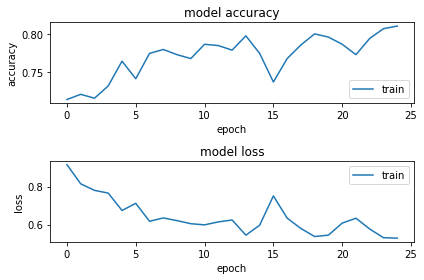

In [ ]:
# plotting the metrics
plt.subplot(2,1,1)
plt.plot(dahist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(dahist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

10/10 [==============================] - 1s 48ms/step
(292,)
[4 2 2 1 2 3 2 4 1 4 2 4 4 2 0 0 2 4 3 3 2 4 3 0 0 0 4 2 4 4 3 3 2 2 2 0 4
 1 2 4 3 4 0 1 2 0 4 4 2 2 4 0 3 4 4 2 3 2 3 4 2 3 2 0 3 4 0 1 1 3 1 4 3 3
 1 4 2 3 4 3 4 1 2 0 4 3 0 0 4 3 0 2 2 2 0 0 3 2 1 4 2 3 3 1 3 4 1 0 3 4 4
 0 1 4 3 3 0 4 2 3 3 3 4 4 1 3 3 4 4 0 1 3 1 4 2 3 4 0 3 2 3 4 1 1 0 0 0 2
 0 2 3 4 1 3 4 2 0 1 2 4 4 0 2 4 4 4 3 4 0 3 3 2 1 4 4 4 0 2 0 4 3 3 3 0 2
 0 4 2 2 3 4 3 3 0 4 3 2 3 2 0 3 2 0 2 4 0 2 2 4 2 3 2 4 0 2 1 1 3 4 2 2 2
 3 2 4 4 3 3 4 1 3 0 4 2 0 2 3 4 0 0 0 2 3 4 0 4 0 3 2 4 1 1 3 3 4 3 3 1 2
 2 0 2 4 2 1 2 4 3 3 2 0 0 3 3 0 0 2 3 4 1 4 2 0 3 1 4 0 2 0 2 3 0]
(292, 5)
[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]

0  classified correctly
1  classified incorrectly


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


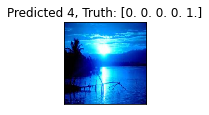

In [ ]:
# Create predictions on the test set
from keras.models import Sequential, load_model
img_model = load_model("./drive/My Drive/ML2 Final Project/keras_weather_Conv.h5")
predict_x = model.predict(x_test)
classes_x = np.argmax(predict_x, axis=1)
predicted_classes = img_model.predict(x_test)
print(classes_x.shape)
print(classes_x)
print(y_test.shape)
print(y_test)
# see which we predicted correctly and which not
correct_indices = np.nonzero(classes_x == y_test)[0]
incorrect_indices = np.nonzero(classes_x != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (5,14)

#figure_evaluation = plt.figure()

# plot 25 correct predictions
for i, correct in enumerate(correct_indices[:25]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(300,300,3), interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(classes_x[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 25 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:25]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(300,300,3), interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(classes_x[incorrect],
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
#Evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=bs)
score_train = model.evaluate(x_train, y_train, batch_size=bs)
print('Network test score [loss, accuracy]:', score)
print('Network test score_train [loss, accuracy]:', score_train)

117/117 [==============================] - 2s 16ms/step - loss: 0.2236 - accuracy: 0.9409
Network test score [loss, accuracy]: [0.60333651304245, 0.8082191944122314]
Network test score_train [loss, accuracy]: [0.22355356812477112, 0.9409246444702148]


**Summary CNN-Data Augmentation Model**

* To handle problem of overfitting in our learning model, another way is to artificially tamper the dataset by changing hue, saturation, angles, positioning, width, zoom and focus of the same images in the dataset

* Existing CNN model is used to make changes on images by applying data augmentation technique to see if there is any increase in accuracy

* Goal here is to enhance learning capacity of our model

* Using above model, accuracy of  94.09% is achieved for train dataset

* From above graphs, it is seen that training loss decreases as number of epochs increase and also accuracy is higher at more number of epochs

* When applied to test dataset, accuracy was 80.82%

In [ ]:
# Prediction accuracy:
#from sklearn.metrics import accuracy_score
#accuracy_score(Y_test, predicted_classes)
#np.argmax(Y_test, axis=1)

import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

10/10 [==============================] - 1s 53ms/step
[[30 15  9  2  0]
 [ 5 36  4  0  3]
 [ 6  9 35  1  3]
 [ 2  2  0 53  0]
 [ 0  0  1  0 76]]


## **Model 4: CNN with Different Architecture**

**Idea:**

Created model4 with different architecture by adding more layers and changing optimiser from adam to SGD with nestrov and momentum.

**Details**
1.   Stochastic Gradient Descent optimizer
2.   Using 'softmax' activation in the final layer
3.   L2 regulisation with lambda = 0.01 to reduce overfitting.
4.   RandomNormal() with std = .01 as weight initialiser
5.   SGD and Nestrov as optimizer to reduce loss acting on cost function used.   
6. Drop out with 20% as another regulizer has been used.
7. decay of value decay=1e-6 has been used
8. Constant learning rate of .01 has been used
9. Adding more dense layers and drop out.

In [ ]:
#Create the network layers
#Four layers

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(300,300,3),
                 kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.RandomNormal(stddev=.01)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
#Flatten before passing to dense layer
model.add(Flatten())
model.add(Dense(128, activation='softmax'))
model.add(Dropout(0.50))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(64, activation='softmax'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='softmax'))
model.add(Dropout(0.20))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(16, activation='softmax'))
model.add(Dropout(0.15))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.20))

#Last layer must have neurons equal to the number of classes
model.add(Dense(5, activation='softmax'))

#Momentum Stochastic Gradient Descent
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 296, 296, 32)      2432      
                                                                 
 conv2d_3 (Conv2D)           (None, 296, 296, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 148, 148, 16)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 148, 148, 16)      0         
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               44859520  
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer=sgd, metrics=['accuracy'])

In [ ]:
#Run the model fit using SGD optimizer

start_time = time.time()
sgd_train = model.fit(x_train, y_train,
          batch_size=bs,
          epochs=ep,validation_data =(x_test,y_test),
          verbose=1,
          )
print('Training duration SGD : ', time.time() - start_time)

Epoch 1/25
117/117 [==============================] - 7s 56ms/step - loss: 1.6095 - accuracy: 0.2106 - val_loss: 1.6142 - val_accuracy: 0.2397
Epoch 2/25
117/117 [==============================] - 5s 46ms/step - loss: 1.6070 - accuracy: 0.2320 - val_loss: 1.6143 - val_accuracy: 0.2397
Epoch 3/25
117/117 [==============================] - 5s 46ms/step - loss: 1.6071 - accuracy: 0.2363 - val_loss: 1.6126 - val_accuracy: 0.2397
Epoch 4/25
117/117 [==============================] - 6s 48ms/step - loss: 1.6061 - accuracy: 0.2354 - val_loss: 1.6150 - val_accuracy: 0.2397
Epoch 5/25
117/117 [==============================] - 5s 46ms/step - loss: 1.6057 - accuracy: 0.2269 - val_loss: 1.6159 - val_accuracy: 0.2397
Epoch 6/25
117/117 [==============================] - 5s 46ms/step - loss: 1.6051 - accuracy: 0.2354 - val_loss: 1.6133 - val_accuracy: 0.2397
Epoch 7/25
117/117 [==============================] - 5s 46ms/step - loss: 1.6045 - accuracy: 0.2354 - val_loss: 1.6105 - val_accuracy: 0.2397

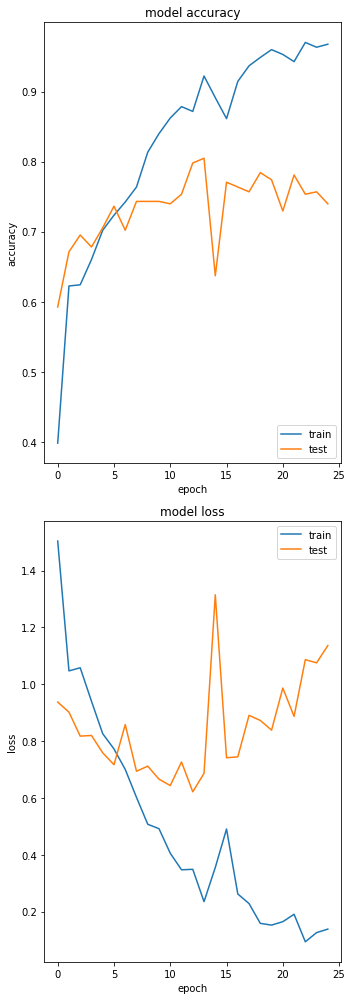

In [ ]:
# plotting the metrics
plt.subplot(2,1,1)
plt.plot(conv_train.history['accuracy'])
plt.plot(conv_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(conv_train.history['loss'])
plt.plot(conv_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
#Evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=bs)
score_train = model.evaluate(x_train, y_train, batch_size=bs)
print('Network test score [loss, accuracy]:', score)
print('Network test score_train [loss, accuracy]:', score_train)

117/117 [==============================] - 2s 16ms/step - loss: 1.6029 - accuracy: 0.2354
Network test score [loss, accuracy]: [1.6134510040283203, 0.2397260218858719]
Network test score_train [loss, accuracy]: [1.602885365486145, 0.23544520139694214]


**Summary CNN-New Architecture**

* Architecture and Cost function was changed to SGD with multiple dense layers and dropouts to see if this can make model train and learn with better accuracy

* Kernel size of 5 is used in activation layer and 3 in the corresponding layer

* RandomNormal initializerwas used for this CNN model with standard deviation of 0.01

* Padding is added to second layer to retain image shape

* Max Pooling of pool size = 2 and stride = 2 which pick the best pixel matrix is added to the model

* Dropout is added to model to reduce overfitting which is in addition to L2 regularizer or 0.01 for max image learning on categorical crossentropy cost function

* Using above model, accuracy of 23.54% is achieved for train dataset

* From above graphs, it is seen that training loss increases as number of epochs increase but accuracy is flattened after 15 epochs with best score around 13 epochs

* When applied to test dataset, accuracy was 23.97%

* The above results show that this is not the optimal model to predict these images since it is not able to learn given costfunction and loss of fidelity in layers and dropout


## **Model 5: Keras Tuner**

Using Keras Tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras

# install and import the Keras Tuner

!pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 135 kB 16.6 MB/s 
     |████████████████████████████████| 1.6 MB 59.9 MB/s 


In [ ]:
# Normalize pixel values between 0 and 1

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

**Defining Keras Model**

**Idea:**
   * Tunning different hyperparameters.
   * Using learning rate Schedule
   * Units choosen from range between 32-512.

In [ ]:
# defining Keras Tuner model

def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(300, 300, 3)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512

  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(64))
  model.add(keras.layers.Dense(units=hp_units, activation='softmax'))
  model.add(keras.layers.Dense(5))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

**Hyperparameter Tuning**

In [ ]:
# instantiate tuner and perform hypertuning

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=25,
                     factor=5,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [ ]:
# create a callback to stop training early after reaching a certain value for the validation loss
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 44 Complete [00h 01m 23s]
val_accuracy: 0.6495726704597473

Best val_accuracy So Far: 0.6623931527137756
Total elapsed time: 00h 12m 08s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 96 and the optimal learning rate for the optimizer
is 0.001.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for specified epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
30/30 [==============================] - 2s 39ms/step - loss: 1.5931 - accuracy: 0.3522 - val_loss: 1.5352 - val_accuracy: 0.5342
Epoch 2/50
30/30 [==============================] - 1s 29ms/step - loss: 1.5043 - accuracy: 0.5128 - val_loss: 1.4807 - val_accuracy: 0.5769
Epoch 3/50
30/30 [==============================] - 1s 30ms/step - loss: 1.4566 - accuracy: 0.5985 - val_loss: 1.4629 - val_accuracy: 0.6496
Epoch 4/50
30/30 [==============================] - 1s 29ms/step - loss: 1.4556 - accuracy: 0.5193 - val_loss: 1.4281 - val_accuracy: 0.5470
Epoch 5/50
30/30 [==============================] - 1s 38ms/step - loss: 1.4203 - accuracy: 0.5535 - val_loss: 1.4056 - val_accuracy: 0.5684
Epoch 6/50
30/30 [==============================] - 1s 38ms/step - loss: 1.3865 - accuracy: 0.6167 - val_loss: 1.3742 - val_accuracy: 0.6538
Epoch 7/50
30/30 [==============================] - 1s 37ms/step - loss: 1.3594 - accuracy: 0.6435 - val_loss: 1.3521 - val_accuracy: 0.6111
Epoch 8/50
30

In [ ]:
# re-instantiate the hypermodel and train it with the optimal number of epochs from above

hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/47
30/30 [==============================] - 2s 45ms/step - loss: 1.5959 - accuracy: 0.3126 - val_loss: 1.5412 - val_accuracy: 0.4915
Epoch 2/47
30/30 [==============================] - 1s 29ms/step - loss: 1.5022 - accuracy: 0.3897 - val_loss: 1.4746 - val_accuracy: 0.4701
Epoch 3/47
30/30 [==============================] - 1s 29ms/step - loss: 1.4667 - accuracy: 0.5000 - val_loss: 1.4501 - val_accuracy: 0.4786
Epoch 4/47
30/30 [==============================] - 1s 30ms/step - loss: 1.4397 - accuracy: 0.5321 - val_loss: 1.4520 - val_accuracy: 0.4444
Epoch 5/47
30/30 [==============================] - 1s 29ms/step - loss: 1.4287 - accuracy: 0.4989 - val_loss: 1.4218 - val_accuracy: 0.4658
Epoch 6/47
30/30 [==============================] - 1s 29ms/step - loss: 1.4012 - accuracy: 0.5193 - val_loss: 1.3874 - val_accuracy: 0.4786
Epoch 7/47
30/30 [==============================] - 1s 29ms/step - loss: 1.3742 - accuracy: 0.5193 - val_loss: 1.3635 - val_accuracy: 0.4829
Epoch 8/47
30

In [ ]:
# evluate hypermodel on test data

eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)

10/10 [==============================] - 0s 19ms/step - loss: 0.9530 - accuracy: 0.6644
[test loss, test accuracy]: [0.9529639482498169, 0.664383590221405]


**Summary Keras Tuner Model**

* Model was defined using puthon object oriented programming with optimal layers and dynamic learning rate

* Hyperband tuner is used to define inline hyperparameters to instantiate the model

* The Hyperband tuning algorithm uses adaptive resource allocation and early-stopping to quickly converge on a high-performing model. This is done using a sports championship style bracket.

* The algorithm trains a large number of models for a few epochs and carries forward only the top-performing half of models to the next round. Hyperband determines the number of models to train in a bracket by computing 1 + log<sub>`factor`</sub>(`max_epochs`) and rounding it up to the nearest integer.

* Best val accuracy achieved during hyper tuning is 66.24% with best learning rate = 0.01 and best first dense layer as 96

* Using these parameters, best epoch achieved was 47

* Using above model setup, accuracy of 71.37% is achieved for train dataset

* When applied to test dataset, accuracy was 66.44%

##**TRANSFER LEARNING**

## **Model 6: VGG 16**


VGG16 Model used for classifiation by loading a test images from existing dataset.

In [ ]:
# Use VGG16 Model for Classification
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Input
from keras.utils.vis_utils import plot_model
import numpy as np
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [ ]:
# import VGG16 into python notebook
vgg16 = keras.applications.vgg16
vggconv_model = vgg16.VGG16(weights='imagenet', include_top=False)
vggconv_model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [ ]:
# add extra layers foe exhisting convolution model

vggconv_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(300,300,3))

# flatten the output of the convolutional part:
x = keras.layers.Flatten()(vggconv_model.output)

# three hidden layers
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)

# final softmax layer with 5 categories
predictions = keras.layers.Dense(5, activation='softmax')(x)

# creating the full model:
vgg_model = keras.models.Model(inputs=vggconv_model.input, outputs=predictions)
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
#lock all the layers of the convolutional part
for layer in vggconv_model.layers:
    layer.trainable = False

vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
#compile the model
vgg_model.compile(loss='mean_squared_error',
                  optimizer=keras.optimizers.Adamax(learning_rate=0.001),
                  metrics=['acc'])

In [ ]:
#fitting the model
# we tried different batch size and epoch to improve accuracy and excluded prespecified epochs and batch size
history = vgg_model.fit(x_train, y_train,
          validation_data =(x_test,y_test),
          batch_size=20,
          epochs=5,
          verbose=1
          )
_,accuracy = vgg_model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
59/59 [==============================] - 29s 325ms/step - loss: 0.1023 - acc: 0.6139 - val_loss: 0.0555 - val_acc: 0.8493
Epoch 2/5
59/59 [==============================] - 16s 266ms/step - loss: 0.0400 - acc: 0.8853 - val_loss: 0.0536 - val_acc: 0.8082
Epoch 3/5
59/59 [==============================] - 16s 270ms/step - loss: 0.0253 - acc: 0.9255 - val_loss: 0.0364 - val_acc: 0.8836
Epoch 4/5
59/59 [==============================] - 16s 272ms/step - loss: 0.0171 - acc: 0.9538 - val_loss: 0.0262 - val_acc: 0.9281
Epoch 5/5
10/10 [==============================] - 9s 374ms/step - loss: 0.0262 - acc: 0.9178
Accuracy: 91.78


In [ ]:
#compile the model using a different loss function (categorical)
vgg_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(learning_rate=0.001),
                  metrics=['acc'])

In [ ]:
#fitting the model
# we tried different batch size and epoch to improve accuracy and excluded prespecified epochs and batch size
history = vgg_model.fit(x_train, y_train,
          validation_data =(x_test,y_test),
          batch_size=20,
          epochs=5,
          verbose=1
          )
_,accuracy = vgg_model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
59/59 [==============================] - 17s 281ms/step - loss: 0.3129 - acc: 0.9152 - val_loss: 0.2082 - val_acc: 0.9384
Epoch 2/5
59/59 [==============================] - 16s 278ms/step - loss: 0.0790 - acc: 0.9854 - val_loss: 0.2132 - val_acc: 0.9384
Epoch 3/5
59/59 [==============================] - 16s 280ms/step - loss: 0.0599 - acc: 0.9880 - val_loss: 0.1893 - val_acc: 0.9384
Epoch 4/5
59/59 [==============================] - 16s 276ms/step - loss: 0.0475 - acc: 0.9923 - val_loss: 0.1881 - val_acc: 0.9315
Epoch 5/5
10/10 [==============================] - 3s 262ms/step - loss: 0.1978 - acc: 0.9315
Accuracy: 93.15


**Summary VGG 16 Model**

* Existing VGG 16 framework was imported into python sheet to see if these professional setup enhances prediction accuracy

* Additional relu and softmax activations were included by trying and testing for best achievable accuracy

* Using above model setup, accuracy of 91.78% is achieved for train dataset

* When applied to test dataset, accuracy was 93.15%

## **Model 7: VGG 19**

VGG19 Model used for classifiation by loading a test image from existing dataset.

In [ ]:
# import VGG19 into python notebook
vgg19 = keras.applications.vgg19
vgg19conv_model = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(300,300,3))

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
#lock all the layers of the convolutional part
for layer in vgg19conv_model.layers:
    layer.trainable = False
x = keras.layers.Flatten()(vgg19conv_model.output)

# three hidden layers
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)

# final softmax layer with 5 categories
predictions = keras.layers.Dense(5, activation='softmax')(x)

# creating the full model:
vgg19_model = keras.models.Model(inputs=vgg19conv_model.input, outputs=predictions)
vgg19_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
#compile the model
vgg19_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(learning_rate=0.001),
                  metrics=['acc'])

In [ ]:
#fitting the model
# we tried different batch size and epoch to improve accuracy and excluded prespecified epochs and batch size
start_time = time.time()
history = vgg19_model.fit(x_train, y_train,
          validation_data =(x_test,y_test),
          batch_size=20,
          epochs=5,
          verbose=1
          )
_,accuracy = vgg19_model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
59/59 [==============================] - 27s 406ms/step - loss: 1.2094 - acc: 0.5428 - val_loss: 0.8047 - val_acc: 0.7260
Epoch 2/5
59/59 [==============================] - 21s 354ms/step - loss: 0.5557 - acc: 0.8211 - val_loss: 0.5665 - val_acc: 0.7877
Epoch 3/5
59/59 [==============================] - 20s 345ms/step - loss: 0.3523 - acc: 0.8904 - val_loss: 0.5590 - val_acc: 0.7705
Epoch 4/5
59/59 [==============================] - 20s 340ms/step - loss: 0.2332 - acc: 0.9324 - val_loss: 0.3544 - val_acc: 0.8699
Epoch 5/5
10/10 [==============================] - 10s 441ms/step - loss: 0.3000 - acc: 0.8870
Accuracy: 88.70


In [ ]:
#compile the model using a different loss function (categorical)
vgg19_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(learning_rate=0.001),
                  metrics=['acc'])

In [ ]:
#fitting the model
# we tried different batch size and epoch to improve accuracy and excluded prespecified epochs and batch size
history = vgg19_model.fit(x_train, y_train,
          validation_data =(x_test,y_test),
          batch_size=20,
          epochs=5,
          verbose=1
          )
_,accuracy = vgg19_model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
59/59 [==============================] - 23s 357ms/step - loss: 0.3907 - acc: 0.9041 - val_loss: 0.3774 - val_acc: 0.8596
Epoch 2/5
59/59 [==============================] - 21s 353ms/step - loss: 0.1055 - acc: 0.9760 - val_loss: 0.3527 - val_acc: 0.8699
Epoch 3/5
59/59 [==============================] - 20s 343ms/step - loss: 0.0831 - acc: 0.9803 - val_loss: 0.2787 - val_acc: 0.9007
Epoch 4/5
59/59 [==============================] - 20s 340ms/step - loss: 0.0698 - acc: 0.9863 - val_loss: 0.2752 - val_acc: 0.8836
Epoch 5/5
10/10 [==============================] - 3s 317ms/step - loss: 0.3259 - acc: 0.8836
Accuracy: 88.36


**Summary VGG 19 Model**

* Existing VGG 19 framework was imported into python sheet to see if these professional setup enhances prediction accuracy

* Additional relu and softmax activations were included by trying and testing for best achievable accuracy

* Using above model setup, accuracy of 88.70% is achieved for train dataset

* When applied to test dataset, accuracy was 88.36%

## **Model 8: ResNet50**

REsNET50 Model used for classifiation by loading a test image from existing dataset.

In [ ]:
# Use REsNet50 for classification
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras import initializers
from keras import applications
from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

In [ ]:
# import VGG16 into python notebook
resnet50 = keras.applications.resnet50
resconv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(300,300,3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
#lock all the layers of the convolutional part
for layer in resconv_model.layers:
    layer.trainable = False
x = keras.layers.Flatten()(resconv_model.output)

# three hidden layers
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)

# final softmax layer with 5 categories
predictions = keras.layers.Dense(5, activation='softmax')(x)

# creating the full model:
resconv_model = keras.models.Model(inputs=resconv_model.input, outputs=predictions)
resconv_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 306, 306, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
#compile the model
resconv_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(learning_rate=0.001),
                  metrics=['acc'])

In [ ]:
#fitting the model
# we tried different batch size and epoch to improve accuracy and excluded prespecified epochs and batch size
start_time = time.time()
history = resconv_model.fit(x_train, y_train,
          validation_data =(x_test,y_test),
          batch_size=20,
          epochs=5,
          verbose=1
          )
_,accuracy = resconv_model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
59/59 [==============================] - 16s 206ms/step - loss: 3.7840 - acc: 0.2654 - val_loss: 1.5322 - val_acc: 0.3699
Epoch 2/5
59/59 [==============================] - 9s 161ms/step - loss: 1.4861 - acc: 0.3801 - val_loss: 1.7370 - val_acc: 0.3836
Epoch 3/5
59/59 [==============================] - 10s 163ms/step - loss: 1.3918 - acc: 0.4341 - val_loss: 2.0132 - val_acc: 0.3082
Epoch 4/5
59/59 [==============================] - 10s 164ms/step - loss: 1.3092 - acc: 0.4580 - val_loss: 1.0852 - val_acc: 0.5685
Epoch 5/5
10/10 [==============================] - 4s 255ms/step - loss: 1.2949 - acc: 0.4384
Accuracy: 43.84


In [ ]:
#compile the model using a different loss function (categorical)
resconv_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(learning_rate=0.001),
                  metrics=['acc'])

In [ ]:
#fitting the model
# we tried different batch size and epoch to improve accuracy and excluded prespecified epochs and batch size
history = resconv_model.fit(x_train, y_train,
          validation_data =(x_test,y_test),
          batch_size=20,
          epochs=5,
          verbose=1
          )
_,accuracy = resconv_model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
59/59 [==============================] - 14s 177ms/step - loss: 2.2497 - acc: 0.3844 - val_loss: 1.1918 - val_acc: 0.5651
Epoch 2/5
59/59 [==============================] - 9s 158ms/step - loss: 1.1565 - acc: 0.5308 - val_loss: 1.2094 - val_acc: 0.5445
Epoch 3/5
59/59 [==============================] - 9s 161ms/step - loss: 1.1447 - acc: 0.4914 - val_loss: 1.0679 - val_acc: 0.6027
Epoch 4/5
59/59 [==============================] - 10s 166ms/step - loss: 1.0273 - acc: 0.5719 - val_loss: 0.9523 - val_acc: 0.6575
Epoch 5/5
10/10 [==============================] - 2s 173ms/step - loss: 1.2081 - acc: 0.4897
Accuracy: 48.97


**Summary ResNet50 Model**

* Existing ResNet50 framework was imported into python sheet to see if these professional setup enhances prediction accuracy

* Additional relu and softmax activations were included by trying and testing for best achievable accuracy

* Using above model setup, accuracy of 43.84% is achieved for train dataset

* When applied to test dataset, accuracy was 48.97%


## **Model Summary - Accuracy**

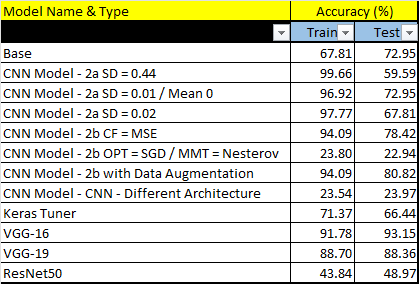

### **Top 3 best model selection:**
    1. VGG - 16 -- Test Score = 93.15%
    2. VGG - 19 -- Test Score = 88.36%
    3. CNN 2b with Data Augmentation -- Test Score = 80.82%

# **Different Architecture Models:**
  * Changing the layers and building models


###**Architecture - 1 :**

 1. convolutional layers with 5x5 kernel size and stride = 1 and number of filter = 32
 2. Convolutional layer with 3x3 kernel size and stride = 1 and number of filter = 16
 3. Max pooling layer with size 2x2 and stride 2.
 4. Output layer with softmax activation
 5. Added 3 dense layer and with each drop out layer

In [ ]:
# model with optimiser changed to only sgd aand repacing adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import keras
from keras import regularizers, optimizers
from tensorflow.keras import layers, initializers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

#Kernel size is the size of the local receptive field.  Strides is how much you slide the receptive field
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(300,300,3),
                 kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

#Flatten before passing to dense layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(100, activation='softmax'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.20))

#Last layer must have neurons equal to the number of classes
model.add(Dense(5, activation='softmax'))

model.summary()

#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#Run the model fit
start_time = time.time()
conv_train = model.fit(x_train, y_train, batch_size=bs, epochs=ep,validation_data =(x_test,y_test), verbose=1)
print('Training duration CNN: ', time.time() - start_time)

#Evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=bs)
score_train = model.evaluate(x_train, y_train, batch_size=bs)
print('Network test score [loss, accuracy]:', score)
print('Network test score_train [loss, accuracy]:', score_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 296, 16)      4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 148, 16)      0         
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 128)               44859520  
                                                        

### **Architecture - 2:**
 1. convolutional layers with 5x5 kernel size and stride = 1 and number of filter = 32
 2. Max pooling layer with size 2x2 and stride 2.
 3. Convolutional layer with 3x3 kernel size and stride = 1 and number of filter = 16
 3. Max pooling layer with size 2x2 and stride 2.
 4. one dense layer
 5. one drop out

In [ ]:
model = Sequential()

#Kernel size is the size of the local receptive field.  Strides is how much you slide the receptive field
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(300,300,3),
                 kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding = 'same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

#Flatten before passing to dense layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))

#Last layer must have neurons equal to the number of classes
model.add(Dense(5, activation='softmax'))

model.summary()

#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#Run the model fit
start_time = time.time()
conv_train = model.fit(x_train, y_train, batch_size=bs, epochs=ep,validation_data =(x_test,y_test), verbose=1)
print('Training duration CNN: ', time.time() - start_time)

#Evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=bs)
score_train = model.evaluate(x_train, y_train, batch_size=bs)
print('Network test score [loss, accuracy]:', score)
print('Network test score_train [loss, accuracy]:', score_train)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 296, 296, 32)      2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 148, 148, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 16)        0         
                                                                 
 flatten_1 (Flatten)         (None, 87616)            

### **Architecture - 3:**

    * model with 2 convo and one max pool.
    * one dense layer and 2 drop out.

In [ ]:
# define convolutional model

model = Sequential()

#Kernel size is the size of the local receptive field.  Strides is how much you slide the receptive field
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(300,300,3),
                 kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

#Flatten before passing to dense layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))

#Last layer must have neurons equal to the number of classes
model.add(Dense(5, activation='softmax'))

model.summary()

#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#Run the model fit
start_time = time.time()
conv_train = model.fit(x_train, y_train, batch_size=bs, epochs=ep,validation_data =(x_test,y_test), verbose=1)
print('Training duration CNN: ', time.time() - start_time)

#Evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=bs)
score_train = model.evaluate(x_train, y_train, batch_size=bs)
print('Network test score [loss, accuracy]:', score)
print('Network test score_train [loss, accuracy]:', score_train)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 296, 296, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 296, 296, 16)      4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 148, 148, 16)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 148, 148, 16)      0         
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               44859520  
                                                      

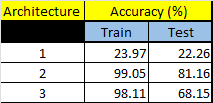

### **Conclusions:**

1. By adding an extra Max-Pooling after each convulational layer, keeping everything else from Arch 1 constant, accuracy for train and test data set increased substantially from ~22% to ~81% for test data whereas reducing a layer and one max pooling after 2 convulations decreased accuracy marginally.

2. Adding more convulational layers and max-pooling after each Conv will increase accuracy of model.